## Importing libraries

In [5]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)

## Data Collection and Preprocessing

In [6]:
df = pd.read_csv("C:\\Users\\franc\\Downloads\\CarPrice_Assignment.csv")

In [7]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [8]:
df.shape

(205, 26)

In [9]:
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [10]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [11]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [12]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [13]:
df['cylindernumber'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [14]:
cyl_nos={
    'four':4,
    'six':6,
    'five':5,
    'three':3,
    'twelve':12,
    'two':2,
    'eight':8
    
}

In [15]:
for i,j in cyl_nos.items():
    df.loc[df['cylindernumber']==i,'cylindernumber']=j
df['cylindernumber'].unique()

array([4, 6, 5, 3, 12, 2, 8], dtype=object)

In [16]:
df['doornumber'].unique()

array(['two', 'four'], dtype=object)

In [17]:
door_nos = {'two': 2, 'four':4}
for i,j in door_nos.items():
    df.loc[df['doornumber']==i, 'doornumber'] = j
    
df['doornumber'].unique()

array([2, 4], dtype=object)

In [18]:
df.duplicated().sum()

0

<Axes: xlabel='price', ylabel='Count'>

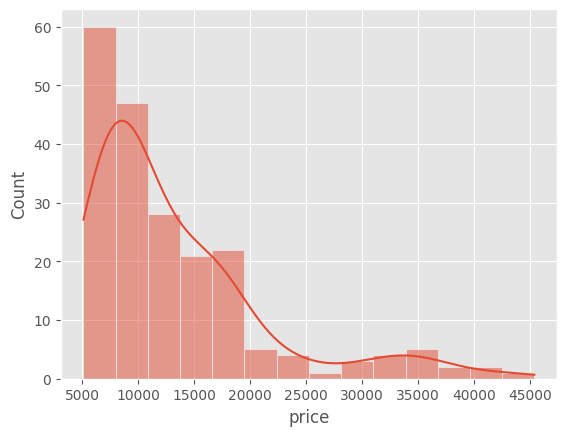

In [19]:
sns.histplot(data=df,x=df.price,kde=True)

Text(0.5, 0, 'price')

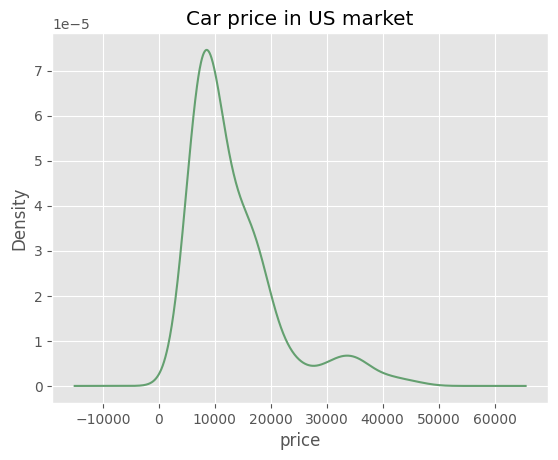

In [20]:
ax = df['price'].plot(kind='kde', 
                      color="#64a070",
                      title='Car price in US market')
ax.set_xlabel('price')

Text(0.5, 28.0, 'price')

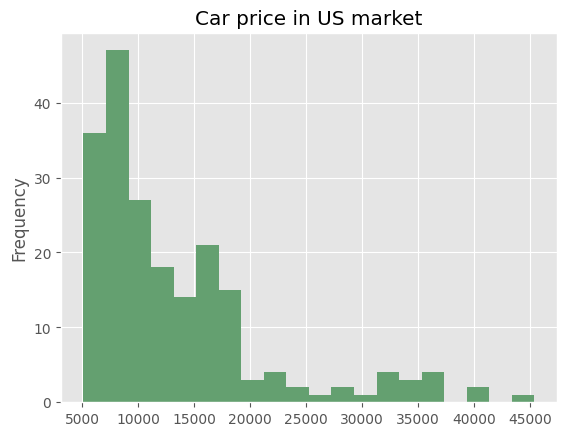

In [21]:
x = df['price'].plot(kind='hist', 
                      bins=20, 
                      color="#64a070",
                      title='Car price in US market')
ax.set_xlabel('price')

In [22]:
m=df.price.mean()
m

13276.710570731706

In [23]:
s=df.price.std()
s

7988.85233174315

In [24]:
df['zscore']=(df.price-m)/s


In [25]:
outliers=df[(df.zscore<-3)|(df.zscore>3)]
outliers

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,zscore
16,17,0,bmw x5,gas,std,2,sedan,rwd,front,103.5,193.8,67.9,53.7,3380,ohc,6,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315.0,3.509677
73,74,0,buick century special,gas,std,4,sedan,rwd,front,120.9,208.1,71.7,56.7,3900,ohcv,8,308,mpfi,3.80,3.35,8.0,184,4500,14,16,40960.0,3.465240
74,75,1,buick regal sport coupe (turbo),gas,std,2,hardtop,rwd,front,112.0,199.2,72.0,55.4,3715,ohcv,8,304,mpfi,3.80,3.35,8.0,184,4500,14,16,45400.0,4.021014


Text(0.5, 0, 'horse power')

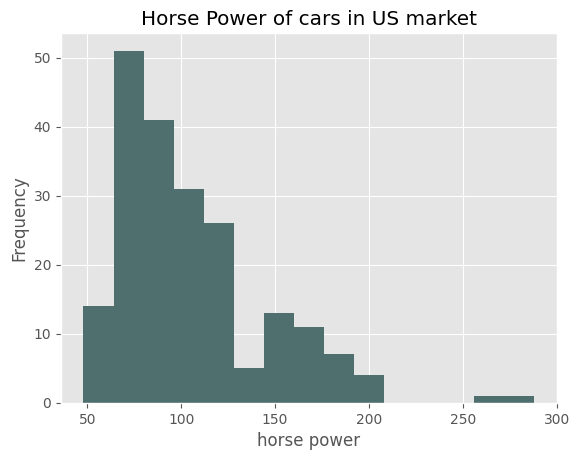

In [26]:
ax = df['horsepower'].plot(kind='hist', 
                           bins=15,
                           color='#4e6f6e',
                           title='Horse Power of cars in US market')
ax.set_xlabel('horse power')

## Exploratory data analysis

# correlation

In [27]:
df_corr = df[['doornumber', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio', 
        'stroke', 'compressionratio', 'horsepower','peakrpm', 'citympg', 'highwaympg', 'price']].corr()
df_corr

,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
doornumber,1.000000,0.447357,0.398568,0.207168,0.552208,0.197379,-0.016009,0.020742,0.119258,-0.011082,0.177888,-0.126947,-0.247668,-0.012417,-0.036330,0.031835
wheelbase,0.447357,1.000000,0.874587,0.795144,0.589435,0.776386,0.339507,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.398568,0.874587,1.000000,0.841118,0.491029,0.877728,0.430672,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.207168,0.795144,0.841118,1.000000,0.279210,0.867032,0.545007,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.552208,0.589435,0.491029,0.279210,1.000000,0.295572,-0.013995,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.197379,0.776386,0.877728,0.867032,0.295572,1.000000,0.609727,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
cylindernumber,-0.016009,0.339507,0.430672,0.545007,-0.013995,0.609727,1.000000,0.846031,0.231399,0.008210,-0.020002,0.692016,-0.124172,-0.445837,-0.466666,0.718305
enginesize,0.020742,0.569329,0.683360,0.735433,0.067149,0.850594,0.846031,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.119258,0.488750,0.606454,0.559150,0.171071,0.648480,0.231399,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.011082,0.160959,0.129533,0.182942,-0.055307,0.168790,0.008210,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


<Axes: >

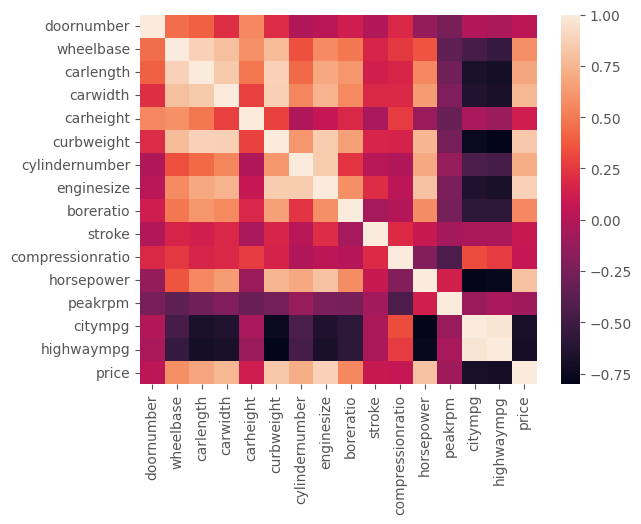

In [28]:


sns.heatmap(df_corr)



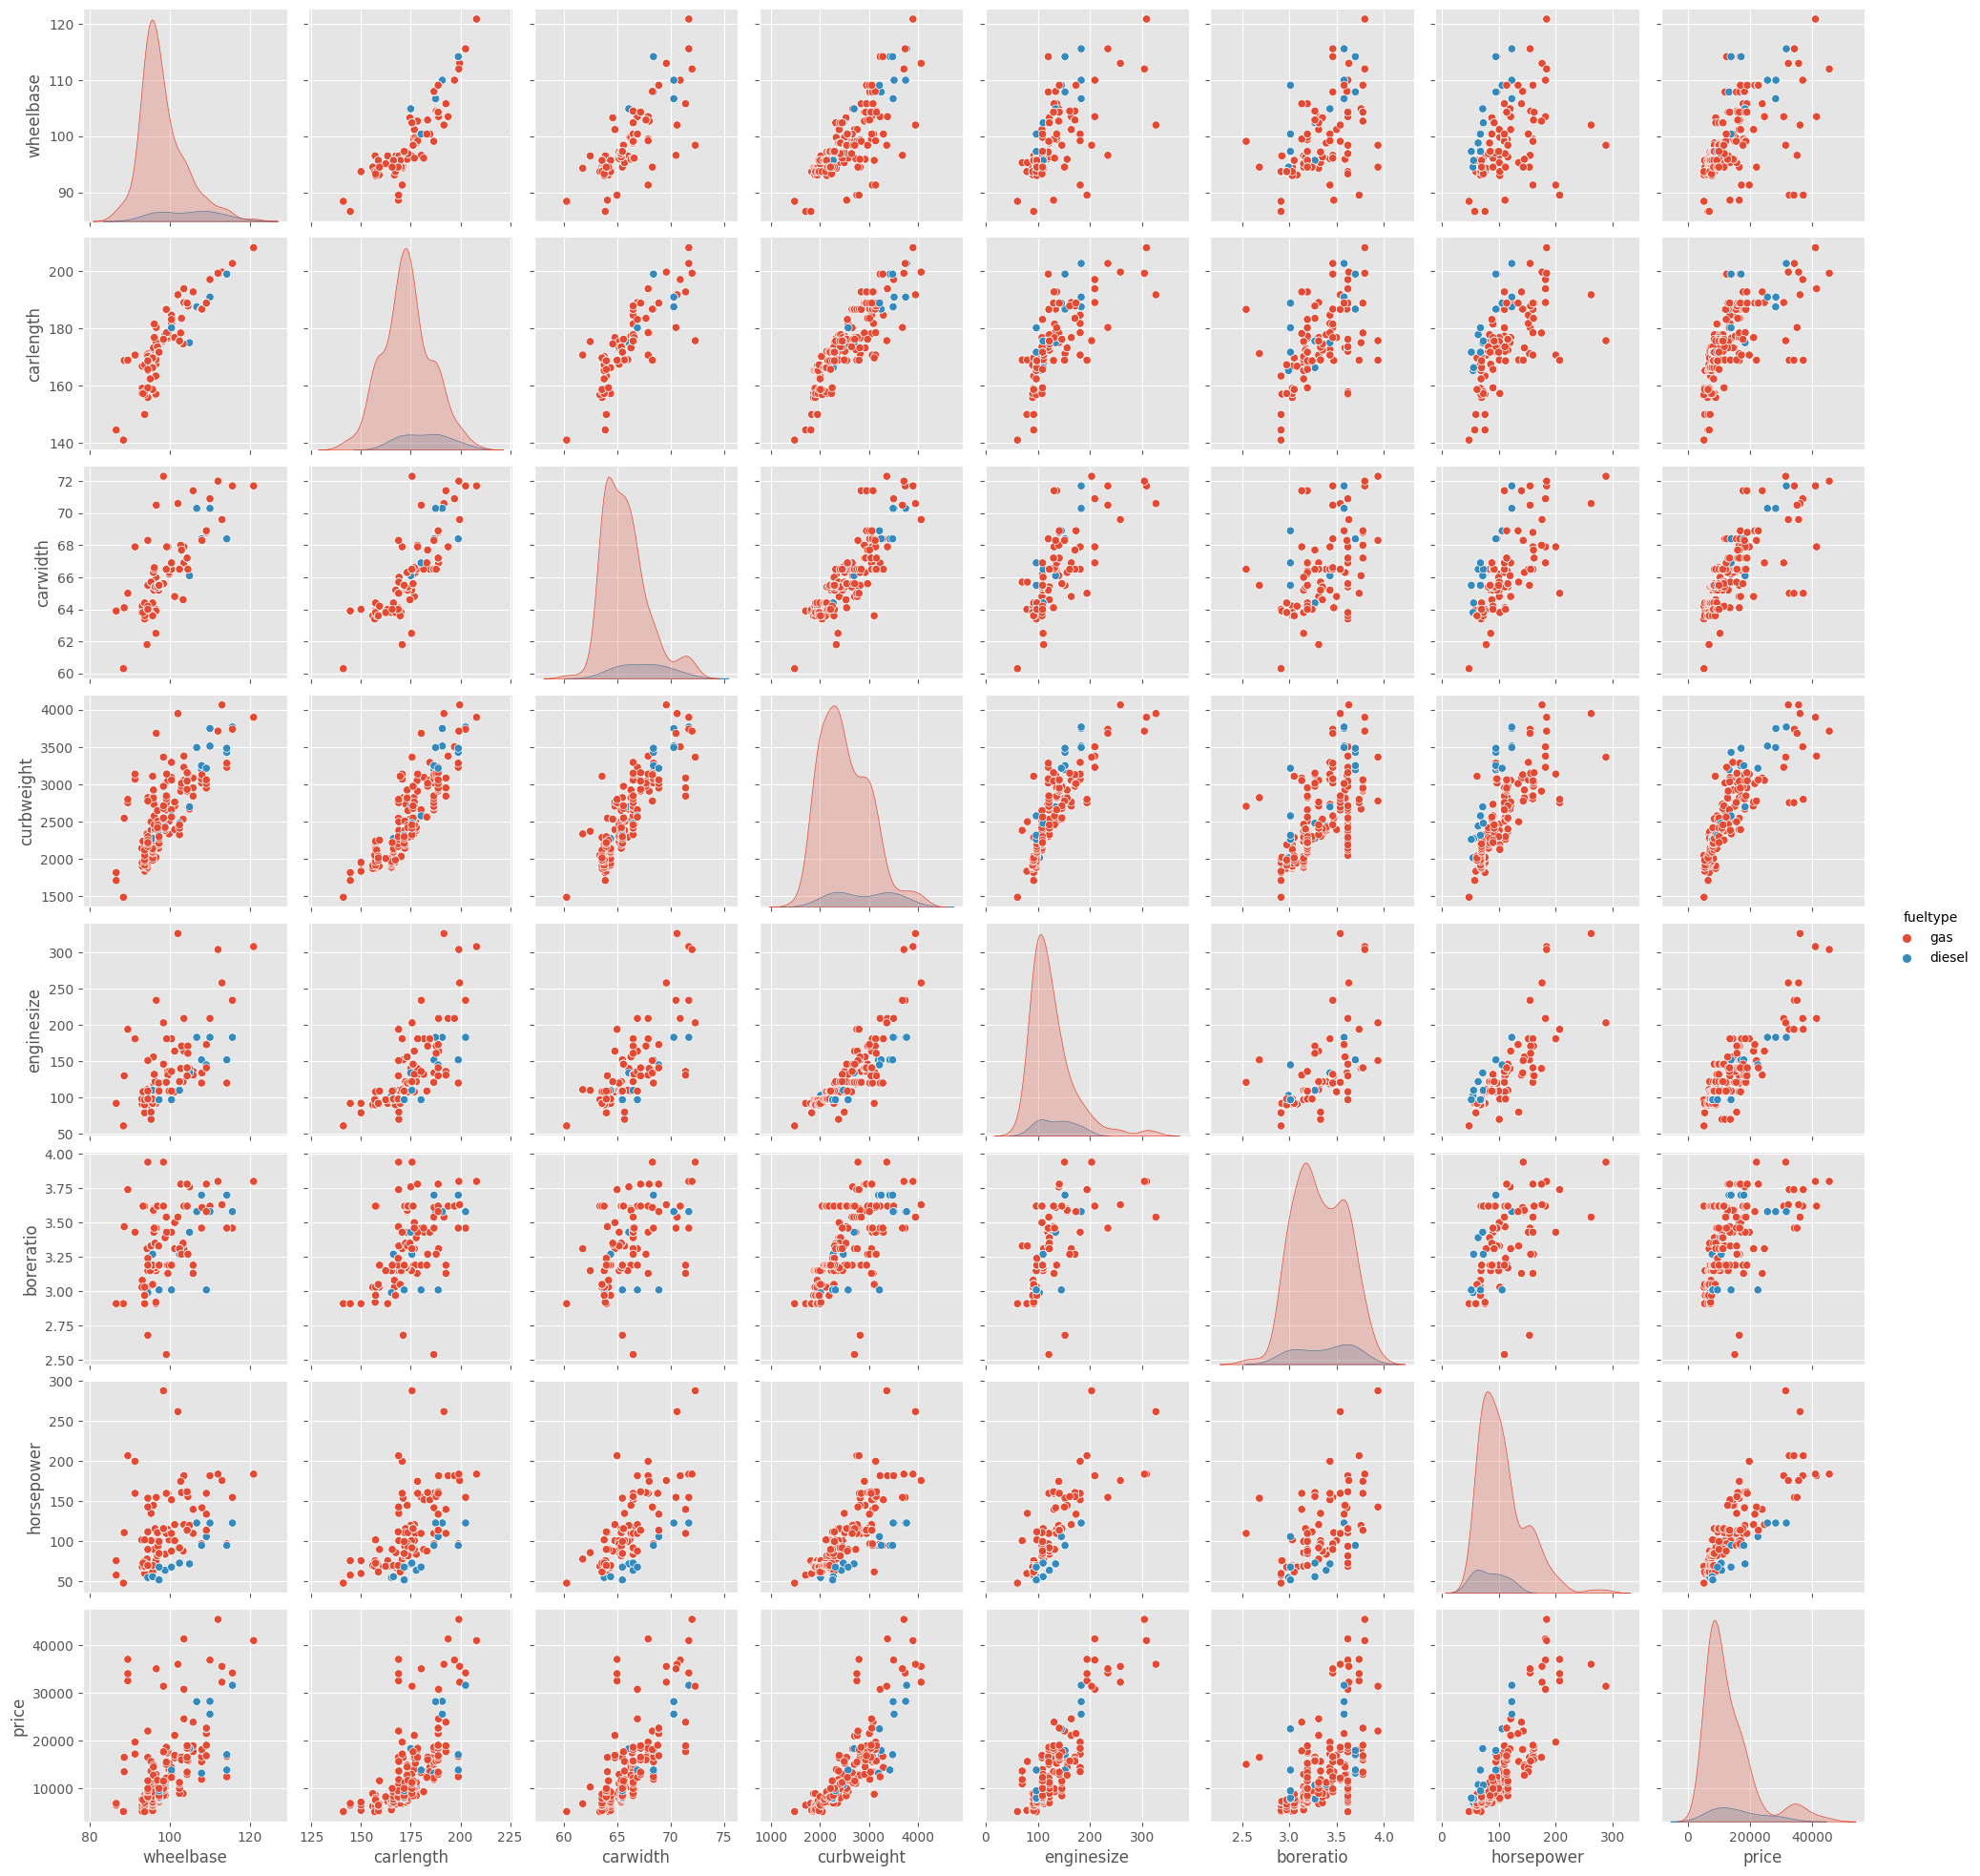

In [29]:
sns.pairplot(df, vars=['wheelbase', 'carlength', 'carwidth',
       'curbweight', 'enginesize', 'boreratio', 
        'horsepower', 'price'],
            hue='fueltype')
plt.show()

## Encoding

In [31]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns


In [32]:
categorical_columns

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

In [41]:
cols_to_encode =['fueltype','aspiration','carbody','enginelocation', 'enginetype', 'fuelsystem']
       


In [43]:
new_encoded_cols_names = []
for col in cols_to_encode:
    new_encoded_cols_names += [f"is_{category}" for category in df[col].unique().tolist()]
one_hot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_cols = one_hot_encoder.fit_transform(df[cols_to_encode])

df_encoded = pd.DataFrame(encoded_cols, columns=new_encoded_cols_names)
df_one_hot_encoded = df.join(df_encoded)

df_one_hot_encoded.head()
    


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,zscore,is_gas,is_diesel,is_std,is_turbo,is_convertible,is_hatchback,is_sedan,is_wagon,is_hardtop,is_front,is_rear,is_dohc,is_ohcv,is_ohc,is_l,is_rotor,is_ohcf,is_dohcv,is_mpfi,is_2bbl,is_mfi,is_1bbl,is_spfi,is_4bbl,is_idi,is_spdi
0,1,3,alfa-romero giulia,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,0.027324,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2,3,alfa-romero stelvio,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,0.403473,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3,1,alfa-romero Quadrifoglio,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,0.403473,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4,2,audi 100 ls,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,0.084279,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5,2,audi 100ls,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,0.522389,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [45]:
df_one_hot_encoded.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'zscore', 'is_gas', 'is_diesel', 'is_std', 'is_turbo',
       'is_convertible', 'is_hatchback', 'is_sedan', 'is_wagon', 'is_hardtop',
       'is_front', 'is_rear', 'is_dohc', 'is_ohcv', 'is_ohc', 'is_l',
       'is_rotor', 'is_ohcf', 'is_dohcv', 'is_mpfi', 'is_2bbl', 'is_mfi',
       'is_1bbl', 'is_spfi', 'is_4bbl', 'is_idi', 'is_spdi'],
      dtype='object')

# Data Splitting & feature scaling

In [47]:
numeric_columns = df_one_hot_encoded.select_dtypes(include=['number'])


In [48]:
scaler = StandardScaler()
scaler.fit(numeric_columns)
scaled_data = pd.DataFrame(scaler.transform(numeric_columns), columns=numeric_columns.columns)

scaled_data.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,zscore,is_gas,is_diesel,is_std,is_turbo,is_convertible,is_hatchback,is_sedan,is_wagon,is_hardtop,is_front,is_rear,is_dohc,is_ohcv,is_ohc,is_l,is_rotor,is_ohcf,is_dohcv,is_mpfi,is_2bbl,is_mfi,is_1bbl,is_spfi,is_4bbl,is_idi,is_spdi
0,-1.723622,1.743470,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059,0.027391,0.027391,-0.328798,0.328798,0.469295,-0.469295,5.759051,-0.201517,-0.720082,-0.938474,-0.372678,0.121867,-0.121867,4.010403,-0.070014,-0.249351,-1.611363,-0.280976,-0.260208,-0.141069,-0.23812,-0.689072,-0.121867,-0.328798,-0.070014,1.08667,-0.214286,-0.070014
1,-1.706724,1.743470,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059,0.404461,0.404461,-0.328798,0.328798,0.469295,-0.469295,5.759051,-0.201517,-0.720082,-0.938474,-0.372678,0.121867,-0.121867,4.010403,-0.070014,-0.249351,-1.611363,-0.280976,-0.260208,-0.141069,-0.23812,-0.689072,-0.121867,-0.328798,-0.070014,1.08667,-0.214286,-0.070014
2,-1.689826,0.133509,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,0.604046,-2.404880,0.685946,-0.288349,1.264536,-0.262960,-0.953012,-0.691627,0.404461,0.404461,-0.328798,0.328798,0.469295,-0.469295,-0.173640,-0.201517,1.388730,-0.938474,-0.372678,0.121867,-0.121867,-0.249351,-0.070014,-0.249351,-1.611363,-0.280976,3.843076,-0.141069,-0.23812,-0.689072,-0.121867,-0.328798,-0.070014,1.08667,-0.214286,-0.070014
3,-1.672928,0.938490,0.173698,0.207256,0.136542,0.235942,-0.420797,-0.431076,-0.517266,0.462183,-0.035973,-0.053668,0.787855,-0.186865,-0.109354,0.084485,0.084485,-0.328798,0.328798,0.469295,-0.469295,-0.173640,-0.201517,-0.720082,1.065559,-0.372678,0.121867,-0.121867,-0.249351,-0.070014,-0.249351,0.620593,-0.280976,-0.260208,-0.141069,-0.23812,-0.689072,-0.121867,-0.328798,-0.070014,1.08667,-0.214286,-0.070014
4,-1.656029,0.938490,0.107110,0.207256,0.230001,0.235942,0.516807,0.218885,-0.517266,0.462183,-0.540725,0.275883,0.787855,-1.106241,-1.273900,0.523668,0.523668,-0.328798,0.328798,0.469295,-0.469295,-0.173640,-0.201517,-0.720082,1.065559,-0.372678,0.121867,-0.121867,-0.249351,-0.070014,-0.249351,0.620593,-0.280976,-0.260208,-0.141069,-0.23812,-0.689072,-0.121867,-0.328798,-0.070014,1.08667,-0.214286,-0.070014


In [49]:
x = scaled_data.drop(columns=['price'])
y = scaled_data[['price']]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75)

In [50]:
reg = LinearRegression()

In [51]:


reg.fit(x_train, y_train)



LinearRegression()

In [52]:


pred = reg.predict(x_test)

pred

array([[-8.12752732e-02],
       [-4.11791833e-01],
       [ 6.35847787e-01],
       [-3.23578795e-01],
       [-1.72750813e-01],
       [-7.71419950e-01],
       [-2.11022472e-01],
       [ 5.75010530e-01],
       [-1.98599868e-01],
       [-3.86319220e-01],
       [-7.62761772e-01],
       [-9.75953736e-01],
       [ 2.29497314e-03],
       [-8.70675303e-01],
       [-6.65263151e-01],
       [ 2.27418851e+00],
       [-8.40936341e-01],
       [-7.88987269e-01],
       [-8.05801703e-01],
       [-4.16183663e-01],
       [-9.66793634e-01],
       [-5.01636122e-01],
       [ 1.86957551e+00],
       [-4.16233245e-02],
       [ 7.08124756e-01],
       [ 4.28929864e-01],
       [-4.13674046e-01],
       [-7.29509346e-01],
       [ 1.52119108e-01],
       [-6.60494879e-01],
       [ 3.39838461e-01],
       [ 2.96176083e+00],
       [-6.38410249e-01],
       [ 3.95677439e-01],
       [ 3.10350461e-01],
       [-7.95386793e-01],
       [-4.56463016e-01],
       [-6.62753534e-01],
       [ 5.2

In [53]:


x_test.iloc[0]



car_ID             -0.337965
symboling           1.743470
wheelbase          -0.475537
carlength          -0.069006
carwidth            0.183272
carheight          -1.446071
curbweight          0.534135
enginesize          0.700337
boreratio           0.926204
stroke              1.932625
compressionratio   -0.793101
horsepower          1.036386
peakrpm            -0.262960
citympg            -0.953012
highwaympg         -0.982764
zscore             -0.081275
is_gas             -0.328798
is_diesel           0.328798
is_std             -2.130854
is_turbo            2.130854
is_convertible     -0.173640
is_hatchback       -0.201517
is_sedan            1.388730
is_wagon           -0.938474
is_hardtop         -0.372678
is_front            0.121867
is_rear            -0.121867
is_dohc            -0.249351
is_ohcv            -0.070014
is_ohc             -0.249351
is_l                0.620593
is_rotor           -0.280976
is_ohcf            -0.260208
is_dohcv           -0.141069
is_mpfi       

In [54]:


y_test.iloc[0]



price   -0.081275
Name: 82, dtype: float64

In [55]:


df.iloc[144]



car_ID                    145
symboling                   0
CarName             subaru r1
fueltype                  gas
aspiration                std
doornumber                  4
carbody                 sedan
drivewheel                4wd
enginelocation          front
wheelbase                97.0
carlength               172.0
carwidth                 65.4
carheight                54.3
curbweight               2385
enginetype               ohcf
cylindernumber              4
enginesize                108
fuelsystem               2bbl
boreratio                3.62
stroke                   2.64
compressionratio          9.0
horsepower                 82
peakrpm                  4800
citympg                    24
highwaympg                 25
price                  9233.0
zscore              -0.506169
Name: 144, dtype: object

In [56]:


reg.coef_



array([[ 3.23575842e-16, -6.93889390e-18, -5.56987879e-16,
         3.13940937e-16, -1.60443659e-16,  2.27425619e-16,
         1.21877330e-15, -6.98078365e-16,  1.90430800e-16,
        -2.05413372e-16,  4.95402991e-16,  7.22245320e-17,
        -3.24190754e-18,  6.83862867e-16, -6.99822726e-16,
         1.00000000e+00, -4.17282328e-16,  7.72765264e-17,
        -2.39543876e-16, -4.49507745e-17, -4.07922584e-16,
        -2.82917032e-16, -4.64009582e-16, -7.94241890e-16,
        -3.17794731e-16,  7.15492205e-17, -1.68693735e-16,
         1.97507882e-16, -1.38777878e-17, -1.45073499e-16,
         6.20593635e-17,  1.10170928e-16, -2.58677430e-16,
        -6.15253606e-17, -2.53498251e-16,  1.05361818e-16,
         4.84080075e-17, -2.71565556e-16, -3.75977627e-17,
         1.59655753e-16, -1.76470502e-17,  5.16765159e-33]])

In [57]:


reg.intercept_



array([1.96023753e-16])

In [58]:
test_data = x_test.iloc[0].values

pred_value = reg.intercept_
for i in range(len(test_data)):
    print(f"{i}, coef: {reg.coef_[0][i]}, feature value: {test_data[i]}")
    pred_value += reg.coef_[0][i]*test_data[i]
    
print(f"\npredicted price: {pred_value}")

0, coef: 3.235758416813331e-16, feature value: -0.3379651542093316
1, coef: -6.938893903907228e-18, feature value: 1.7434704321932961
2, coef: -5.569878787630319e-16, feature value: -0.475537182241917
3, coef: 3.1394093721046843e-16, feature value: -0.06900602884578928
4, coef: -1.6044365912073959e-16, feature value: 0.18327172444389506
5, coef: 2.274256186460947e-16, feature value: -1.4460712601091512
6, coef: 1.2187732972140749e-15, feature value: 0.5341345778932411
7, coef: -6.980783649798794e-16, feature value: 0.7003365763251667
8, coef: 1.9043080042558903e-16, feature value: 0.9262038973116256
9, coef: -2.0541337199767958e-16, feature value: 1.9326248484815627
10, coef: 4.9540299108233765e-16, feature value: -0.7931010789480439
11, coef: 7.222453196387528e-17, feature value: 1.03638566418228
12, coef: -3.241907543606294e-18, feature value: -0.2629602160773477
13, coef: 6.838628672930324e-16, feature value: -0.9530116883199847
14, coef: -6.998227264224579e-16, feature value: -0.98

In [59]:
test_data_df = x_test.copy()
test_data_df['Predicted_price'] = pred
test_data_df.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,zscore,is_gas,is_diesel,is_std,is_turbo,is_convertible,is_hatchback,is_sedan,is_wagon,is_hardtop,is_front,is_rear,is_dohc,is_ohcv,is_ohc,is_l,is_rotor,is_ohcf,is_dohcv,is_mpfi,is_2bbl,is_mfi,is_1bbl,is_spfi,is_4bbl,is_idi,is_spdi,Predicted_price
82,-0.337965,1.743470,-0.475537,-0.069006,0.183272,-1.446071,0.534135,0.700337,0.926204,1.932625,-0.793101,1.036386,-0.262960,-0.953012,-0.982764,-0.081275,-0.328798,0.328798,-2.130854,2.130854,-0.17364,-0.201517,1.388730,-0.938474,-0.372678,0.121867,-0.121867,-0.249351,-0.070014,-0.249351,0.620593,-0.280976,-0.260208,-0.141069,-0.23812,-0.689072,-0.121867,-0.328798,-0.070014,-0.920243,4.666667,-0.070014,-0.081275
188,1.453250,0.938490,-0.242478,-0.190886,-0.190566,0.810288,-0.492032,-0.431076,-0.517266,0.462183,-0.035973,-0.104368,0.787855,0.119594,0.181783,-0.411792,-0.328798,0.328798,0.469295,-0.469295,-0.17364,-0.201517,-0.720082,1.065559,-0.372678,0.121867,-0.121867,-0.249351,-0.070014,-0.249351,0.620593,-0.280976,-0.260208,-0.141069,-0.23812,-0.689072,-0.121867,-0.328798,-0.070014,1.086670,-0.214286,-0.070014,-0.411792
66,-0.608337,-0.671472,1.022697,0.077250,0.089812,0.276967,0.278074,0.170739,0.371023,1.229370,2.992540,-0.814171,-1.944265,0.885740,1.200761,0.635848,3.041381,-3.041381,0.469295,-0.469295,-0.17364,-0.201517,-0.720082,1.065559,-0.372678,0.121867,-0.121867,-0.249351,-0.070014,-0.249351,0.620593,-0.280976,-0.260208,-0.141069,-0.23812,-0.689072,-0.121867,3.041381,-0.070014,-0.920243,-0.214286,-0.070014,0.635848
174,1.216675,-1.476452,0.606521,0.126002,0.276731,0.482090,-0.145484,-0.407003,-0.221170,0.302353,3.118728,-0.788820,-1.313776,0.732511,0.327351,-0.323579,3.041381,-3.041381,-2.130854,2.130854,-0.17364,-0.201517,-0.720082,1.065559,-0.372678,0.121867,-0.121867,-0.249351,-0.070014,-0.249351,0.620593,-0.280976,-0.260208,-0.141069,-0.23812,-0.689072,-0.121867,3.041381,-0.070014,-0.920243,-0.214286,-0.070014,-0.323579
107,0.084491,-0.671472,1.522109,1.027916,1.164596,1.220535,0.894159,-0.166277,0.482059,-0.209105,-0.439775,-0.180418,-0.262960,-0.953012,-0.982764,-0.172751,-0.328798,0.328798,0.469295,-0.469295,-0.17364,-0.201517,-0.720082,1.065559,-0.372678,0.121867,-0.121867,-0.249351,-0.070014,4.010403,-1.611363,-0.280976,-0.260208,-0.141069,-0.23812,-0.689072,-0.121867,-0.328798,-0.070014,1.086670,-0.214286,-0.070014,-0.172751


In [60]:
test_pred = scaler.inverse_transform(test_data_df)
test_pred

array([[ 8.30000000e+01,  3.00000000e+00,  9.59000000e+01, ...,
         2.78383308e+00,  2.95581065e-02, -7.84600455e-04],
       [ 1.89000000e+02,  2.00000000e+00,  9.73000000e+01, ...,
         3.51762767e-01,  2.95581065e-02, -2.38125064e-02],
       [ 6.70000000e+01,  0.00000000e+00,  1.04900000e+02, ...,
         3.51762767e-01,  2.95581065e-02,  4.91791362e-02],
       ...,
       [ 1.87000000e+02,  2.00000000e+00,  9.73000000e+01, ...,
         3.51762767e-01,  2.95581065e-02, -3.69263480e-02],
       [ 9.40000000e+01,  1.00000000e+00,  9.45000000e+01, ...,
         3.51762767e-01,  2.95581065e-02, -4.69453230e-02],
       [ 7.90000000e+01,  2.00000000e+00,  9.37000000e+01, ...,
         3.51762767e-01,  2.95581065e-02, -5.28902646e-02]])

In [61]:
for i in range(len(test_data_df.columns)):
    test_data_df.iloc[i] = test_pred[i]
    
test_data_df['price'] = df.iloc[test_data_df.index]['price']
test_data_df[['Predicted_price', 'price']].head()

,Predicted_price,price
82,-0.000785,12629.0
188,-0.023813,9995.0
66,0.049179,18344.0
174,-0.017666,10698.0
107,-0.007158,11900.0


In [62]:
reg.score(x_test, y_test)


0.9935311918447021

In [63]:
mse = mean_squared_error(y_test, pred)
mse

1.8022140757211238e-30

In [64]:


np.sqrt(mse)



1.3424656702207038e-15